https://matheusfacure.github.io/python-causality-handbook/04-Graphical-Causal-Models.html

check this notebook in conjunction with 2023-06-09_MERCI_BayesianNets_how2.xoop

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import graphviz as gr
from matplotlib import style
import seaborn as sns
from matplotlib import pyplot as plt
style.use("fivethirtyeight")

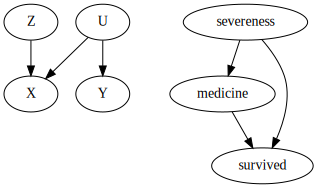

In [3]:
g = gr.Digraph()
g.edge("Z", "X")
g.edge("U", "X")
g.edge("U", "Y")

g.edge("medicine", "survived")
g.edge("severeness", "survived")
g.edge("severeness", "medicine")

g

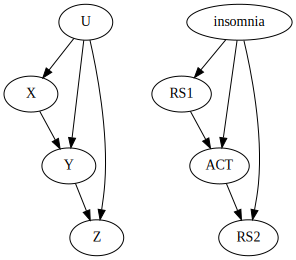

In [4]:
# The SOMNET causality graph: insomnia graph - insomnia influences all measurements

g = gr.Digraph()
g.edge("U", "X")
g.edge("U", "Y")
g.edge("U", "Z")
g.edge("X", "Y")
g.edge("Y", "Z")

g.edge("insomnia", "RS1")
g.edge("insomnia", "ACT")
g.edge("insomnia", "RS2")
g.edge("RS1", "ACT")
g.edge("ACT", "RS2")

g

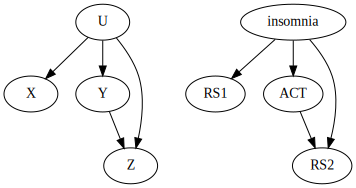

In [6]:
# The SOMNET causality graph: insomnia graph - alternative option in which RS1 does not influence ACT

g = gr.Digraph()
g.edge("U", "X")
g.edge("U", "Y")
g.edge("U", "Z")

g.edge("Y", "Z")

g.edge("insomnia", "RS1")
g.edge("insomnia", "ACT")
g.edge("insomnia", "RS2")

g.edge("ACT", "RS2")

g

In these two examples, insomnia is the "treatment" exerting an influence over RS1 (or not), ACT (already proven), and RS2 (also proven). The control subjects do not have "that treatment" - see below:

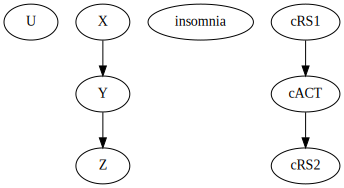

In [15]:
# The SOMNET causality graph: CONTROL graph

g = gr.Digraph()
g.node ("U")
g.edge("X", "Y")
g.edge("Y", "Z")

g.node("insomnia")
g.edge("cRS1", "cACT")
g.edge("cACT", "cRS2")

g

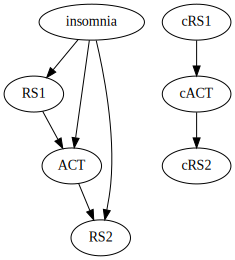

In [22]:
# insomnia "treatment" Vs control "no treatment"

gic = gr.Digraph()

gic.edge("insomnia", "RS1")
gic.edge("insomnia", "ACT")
gic.edge("insomnia", "RS2")
gic.edge("RS1", "ACT")
gic.edge("ACT", "RS2")


gic.edge("cRS1", "cACT")
gic.edge("cACT", "cRS2")

gic

what we want is to test the influence of ACT over RS2. 

https://matheusfacure.github.io/python-causality-handbook/05-The-Unreasonable-Effectiveness-of-Linear-Regression.html



if the treatment (insomnia) has relevance, it will change ACT and ACT+INS will change RS2. The more influence of insomnia, the more different will be ACT and RS2 from cACT and cRS2.

A confounding variable is one that causes both the treatment and the outcome.
To represent its nature on the graph we draw arrows connecting them with treatment and outcome. 
Additionally positive causation is marked with red and negative causation with blue. Also the line's "weight" can be adjusted somehow. Not so the type of line.

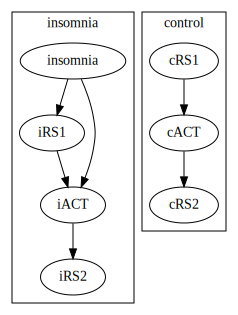

In [94]:
# insomnia "outcome" ; "treatment" is the intervention ACT 

gic = gr.Digraph()

with gic.subgraph(name='cluster0') as c:
    c.edges([("iRS1","iACT"),("insomnia", "iACT"),("insomnia", "iRS1"),("iACT", "iRS2")])
    # c.node("insomnia") # won't accept a node and an edge with the same name:
    # c.edges([("insomnia", "iACT")]) # the edge overwrites the node 
    c.attr(label='insomnia', rank='same')
    
    c.node("insomnia") 
    c.node("iRS1") 
    c.node("iACT")
    c.node("iRS2")
    

with gic.subgraph(name='cluster1') as c:
    c.edges([("cRS1", "cACT"), ("cACT", "cRS2")])
    
    c.attr(label='control')



gic
